# Random forest

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_data = pd.read_csv("data/adult_train.csv")
test_data = pd.read_csv("data/adult_test.csv")

print(train_data.shape)
print(test_data.shape)

print(train_data.head())

(32561, 14)
(16281, 14)
   age workclass     education  education-num      marital-status  \
0   27   Private  Some-college             10            Divorced   
1   27   Private     Bachelors             13       Never-married   
2   25   Private    Assoc-acdm             12  Married-civ-spouse   
3   46   Private       5th-6th              3  Married-civ-spouse   
4   45   Private          11th              7            Divorced   

         occupation   relationship                race     sex  capital-gain  \
0      Adm-clerical      Unmarried               White  Female             0   
1    Prof-specialty  Not-in-family               White  Female             0   
2             Sales        Husband               White    Male             0   
3  Transport-moving        Husband  Amer-Indian-Eskimo    Male             0   
4  Transport-moving  Not-in-family               White    Male             0   

   capital-loss  hours-per-week native-country target  
0             0         

In [3]:
# Split Training data
Xtrain = train_data.iloc[:,:13]
Ytrain = np.array(train_data.iloc[:,13:]).flatten()
print(f"Training data: {Xtrain.shape, Ytrain.shape}")

# Split test data
Xtest = test_data.iloc[:,:13]
Ytest = np.array(test_data.iloc[:,13:]).flatten()
print(f"Test data: {Xtest.shape, Ytest.shape}")

Training data: ((32561, 13), (32561,))
Test data: ((16281, 13), (16281,))


Step 2

In [4]:
# To dict
dicts_for_my_training_data = Xtrain.to_dict("records")
# Create dv
dv = DictVectorizer()

# One-hot encoding
Xtrain_encoded = dv.fit_transform(dicts_for_my_training_data)

In [5]:
model = RandomForestClassifier()

# 5-fold (default) Cross-validation
print(f"""Mean accuracy from 5-fold CV for Random forest:
{np.mean(cross_val_score(model, Xtrain_encoded, Ytrain))}""")

Mean accuracy from 5-fold CV for Random forest:
0.8461041534394826


In [6]:
# To dict
dicts_for_my_test_data = Xtest.to_dict("records")
# One-hot encoding
Xtest_encoded = dv.transform(dicts_for_my_test_data)
# Fit model
model.fit(Xtrain_encoded, Ytrain)
# Predictions
preds = model.predict(Xtest_encoded)

print(f"Accuracy on test data for Random forest model: {accuracy_score(Ytest, preds)}")

Accuracy on test data for Random forest model: 0.8446041397948529


Step 3

In [9]:
# Create pipeline
pipeline = make_pipeline(
  DictVectorizer(),
  RandomForestClassifier())

# Fit model
pipeline.fit(dicts_for_my_training_data, Ytrain)
# Preds
preds = pipeline.predict(dicts_for_my_test_data)


print(f"Accuracy on test data for Random forest pipeline model: {accuracy_score(Ytest, preds)}")

Accuracy on test data for Random forest pipeline model: 0.8446655610834716


### Task 2

Underfitting and overfitting in Decision tree classifiers.

From the plot below we can see a similar effect of overfitting. Around depth=6 the test accuracy begins to decrease but the training accuracy keeps on increasing.

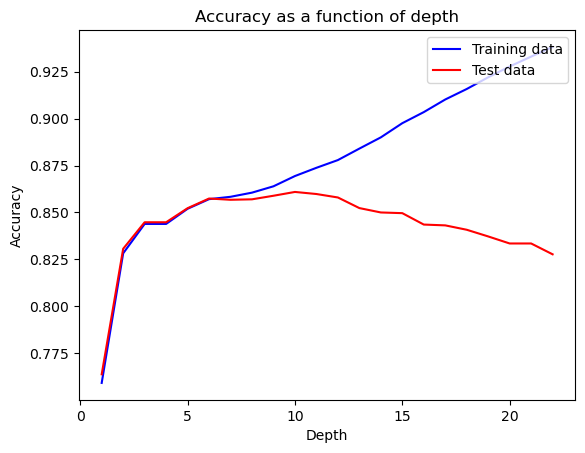

In [18]:
# Plot underfitting/overfitting
train_scores = []
test_scores = []
depth = np.arange(1,23)

for i in range(0,depth.shape[0]):
    tree_regressor = DecisionTreeClassifier(max_depth=i+1)
    tree_regressor.fit(Xtrain_encoded, Ytrain)

    train_score = accuracy_score(Ytrain, tree_regressor.predict(Xtrain_encoded))
    train_scores.append(train_score)

    test_score = accuracy_score(Ytest, tree_regressor.predict(Xtest_encoded))
    test_scores.append(test_score)

plt.plot(depth, train_scores, color='blue', label='Training data')
plt.plot(depth, test_scores, color='red', label='Test data')
plt.legend(loc="upper right")
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of depth')
plt.show()

Underfitting and overfitting in random forest classifiers.

In [46]:
# Plot underfitting/overfitting
ensemble_train_scores = []
ensemble_test_scores = []
depth = np.arange(1,23)
max_ensemble = 500

# Loop over ensemble size
for j in range(0, max_ensemble, 50):
    train_scores = []
    test_scores = []

    # Loop over max depth
    for i in range(0,depth.shape[0]):
        tree_regressor = RandomForestClassifier(n_estimators = j+1, max_depth=i+1, n_jobs=-1)
        tree_regressor.fit(Xtrain_encoded, Ytrain)

        train_score = accuracy_score(Ytrain, tree_regressor.predict(Xtrain_encoded))
        train_scores.append(train_score)

        test_score = accuracy_score(Ytest, tree_regressor.predict(Xtest_encoded))
        test_scores.append(test_score)

    # Append scores for each ensemble size
    ensemble_train_scores.append(train_scores)
    ensemble_test_scores.append(test_scores)

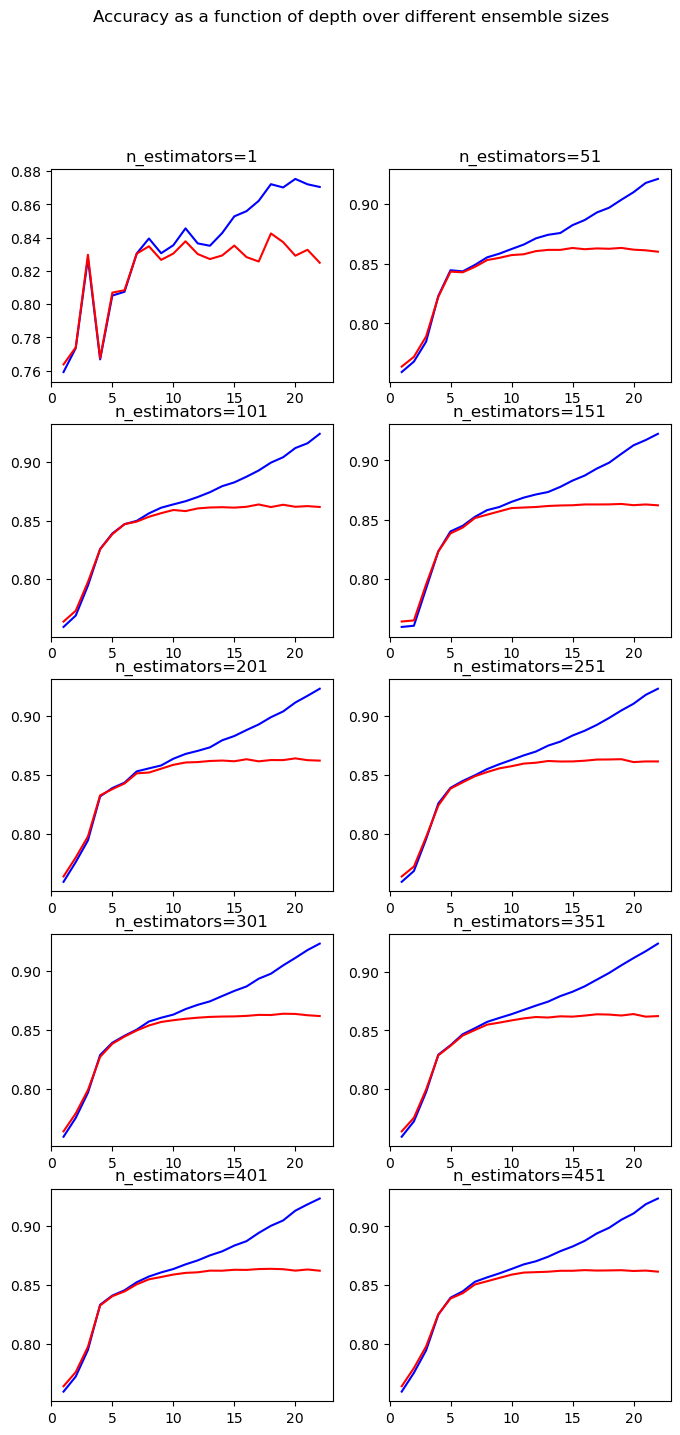

In [48]:
# Plots
fig, axs = plt.subplots(5,2, figsize=(8,16))

axs[0,0].plot(depth, ensemble_train_scores[0], color="blue", label="Training data")
axs[0,0].plot(depth, ensemble_test_scores[0], color="red", label="Test data")
axs[0,0].set_title("n_estimators=1")

axs[0,1].plot(depth, ensemble_train_scores[1], color="blue", label="Training data")
axs[0,1].plot(depth, ensemble_test_scores[1], color="red", label="Test data")
axs[0,1].set_title("n_estimators=51")

axs[1,0].plot(depth, ensemble_train_scores[2], color="blue", label="Training data")
axs[1,0].plot(depth, ensemble_test_scores[2], color="red", label="Test data")
axs[1,0].set_title("n_estimators=101")

axs[1,1].plot(depth, ensemble_train_scores[3], color="blue", label="Training data")
axs[1,1].plot(depth, ensemble_test_scores[3], color="red", label="Test data")
axs[1,1].set_title("n_estimators=151")

axs[2,0].plot(depth, ensemble_train_scores[4], color="blue", label="Training data")
axs[2,0].plot(depth, ensemble_test_scores[4], color="red", label="Test data")
axs[2,0].set_title("n_estimators=201")

axs[2,1].plot(depth, ensemble_train_scores[5], color="blue", label="Training data")
axs[2,1].plot(depth, ensemble_test_scores[5], color="red", label="Test data")
axs[2,1].set_title("n_estimators=251")

axs[3,0].plot(depth, ensemble_train_scores[6], color="blue", label="Training data")
axs[3,0].plot(depth, ensemble_test_scores[6], color="red", label="Test data")
axs[3,0].set_title("n_estimators=301")

axs[3,1].plot(depth, ensemble_train_scores[7], color="blue", label="Training data")
axs[3,1].plot(depth, ensemble_test_scores[7], color="red", label="Test data")
axs[3,1].set_title("n_estimators=351")

axs[4,0].plot(depth, ensemble_train_scores[8], color="blue", label="Training data")
axs[4,0].plot(depth, ensemble_test_scores[8], color="red", label="Test data")
axs[4,0].set_title("n_estimators=401")

axs[4,1].plot(depth, ensemble_train_scores[9], color="blue", label="Training data")
axs[4,1].plot(depth, ensemble_test_scores[9], color="red", label="Test data")
axs[4,1].set_title("n_estimators=451")

fig.suptitle("Accuracy as a function of depth over different ensemble sizes")
plt.show()

* What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?

The difference is that for the Random forest model the curve is not so smooth as for the decision tree model. The accuracy varies a lot more between the different depths.
This is because for decision trees we only consider the feature that gives the best split. For Random forest we randomly choose a subset of the features to consider each time we build a tree. Therefore, we can expect more variance in our results when we run a random forest model with ensemble size of 1 than a single decision tree.

* What happens with the curve for random forests as the ensemble size grows?

As the ensemble size grows the curve smoothens out a lot. Not as sensitive to overfitting, at least for our max_depth=22 and ensemble size of 450. 

* What happens with the best observed test set accuracy as the ensemble size grows?

It pretty much stays the same, the model doesn't overfit. It reaches the potential maximum accuracy and stays there as the ensemble size grows. This makes sense because the trees probably reach the same conclusion, i.e. which class is the correct one. 

* What happens with the training time as the ensemble size grows?

As the ensemble size grows the training takes longer to complete. If one tree takes 10 seconds to train, then we could argue that 5 trees will take 5*10 seconds to train. 


### Task 3

In [55]:
# Get the feature importance scores from our last Random forest model above, with n_estimators=451, max_depth=22.
feature_names = dv.get_feature_names_out()
importances = tree_regressor.feature_importances_

# Sort the feature indices by importance
sorted_indices = np.argsort(importances)[::-1]

# Print the feature names in descending order of importance
print("Top10 features:")
for i in sorted_indices[0:10]:
    print(f"{feature_names[i]}: {importances[i]}")

Top10 features:
capital-gain: 0.13065721666743296
age: 0.12542677210314052
marital-status=Married-civ-spouse: 0.10021626322647159
education-num: 0.08863104177980789
hours-per-week: 0.0801062376633348
relationship=Husband: 0.05719804997178712
capital-loss: 0.04065641814477673
marital-status=Never-married: 0.03426310100102047
occupation=Exec-managerial: 0.024529362945297242
occupation=Prof-specialty: 0.019938863107820247


We can see from above that the most important feature is "capital gain". This makes a lot of sense because the people that invest are people that can afford it, in a sense. If you less than 50k a year, you probably have a lot less money available to invest. This could mean that most of the people with an income of less than 50k/year have 0 in capital gain.

The second feature "Age" is also a very reasonable feature. As you get older you also get more experience and the salary tend to increase.

The third feature is "Marital-status=Married-civ-spouse". This is probably correlated with Age, its more common for "older" people to be married and this could explain why it's deemed important.

An alternative way for computing feature importance would be to somehow include the ML algo. One way would be to use the permutation importance discussed in the paper. The permutation importance calculates the decrease in accuracy when a features values are randomly shuffled. If a feature has a large decrease in accuracy it means that it's an important feature.